In [1]:
import pandas as pd
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import *
from scipy.spatial.distance import euclidean
from tslearn.clustering import TimeSeriesKMeans 
from tslearn import metrics
import random
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
df = pd.read_csv(r'C:\Users\PC\Cookies\Desktop\spinewise_project\spinewise\059-COMBINED-2022-11-9-10-20-34-1667996115-v1.4.3+lucina-buzz.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ts_r', 'acc_x_r', 'acc_y_r', 'acc_z_r', 'temp_r',
       'gyr_x_r', 'gyr_y_r', 'gyr_z_r', 'mag_x_r', 'mag_y_r', 'mag_z_r',
       'kal_status_r', 'alpha_r', 'beta_r', 'ts_n', 'acc_x_n', 'acc_y_n',
       'acc_z_n', 'temp_n', 'gyr_x_n', 'gyr_y_n', 'gyr_z_n', 'mag_x_n',
       'mag_y_n', 'mag_z_n', 'kal_status_n', 'alpha_n', 'beta_n'],
      dtype='object')

In [4]:
df[['ts_r','ts_n']].head()

,ts_r,ts_n
0,1371268.0,1371255.0
1,1371269.0,1371256.0
2,1371270.0,1371257.0
3,1371271.0,1371258.0
4,1371272.0,1371259.0


In [5]:
df['ts'] = df[['ts_r', 'ts_n']].mean(axis=1)
df

,Unnamed: 0,ts_r,acc_x_r,acc_y_r,acc_z_r,temp_r,gyr_x_r,gyr_y_r,gyr_z_r,mag_x_r,...,gyr_x_n,gyr_y_n,gyr_z_n,mag_x_n,mag_y_n,mag_z_n,kal_status_n,alpha_n,beta_n,ts
0,0,1371268.0,0.969238,0.014404,-0.292480,4656.0,-7.263184,1.953125,3.601074,10971.0,...,-2.105713,-3.509521,2.746582,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0,1371261.5
1,1,1371269.0,0.977783,0.008057,-0.298340,4592.0,-5.126953,1.800537,2.532959,10971.0,...,-4.730225,0.335693,2.136230,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0,1371262.5
2,2,1371270.0,0.968994,0.005859,-0.298340,4608.0,-3.936768,0.396729,1.373291,10970.0,...,-1.770020,1.617432,0.091553,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0,1371263.5
3,3,1371271.0,0.955566,0.010498,-0.301270,4672.0,-2.838135,0.762939,0.732422,10970.0,...,-1.831055,0.122070,-1.586914,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0,1371264.5
4,4,1371272.0,0.978271,0.006348,-0.309814,4752.0,-0.183105,0.885010,-0.610352,10974.0,...,0.793457,2.227783,-3.601074,4691.0,-5746.0,-10480.0,1250.0,-705.0,1792.0,1371265.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154161,154161,1525429.0,-0.027832,0.941162,0.010986,4016.0,6.683350,1.312256,-2.777100,3887.0,...,-8.514404,-0.518799,-0.305176,394.0,7378.0,-4242.0,1194.0,-705.0,1792.0,1525422.5
154162,154162,1525430.0,0.109131,0.968506,0.019531,3968.0,-1.800537,0.823975,-6.683350,3887.0,...,-10.009766,-3.326416,-1.647949,416.0,7255.0,-4305.0,1194.0,-705.0,1792.0,1525423.5
154163,154163,1525431.0,0.123291,1.012939,-0.142090,4016.0,-7.293701,5.310059,-5.126953,3887.0,...,-3.692627,-0.640869,2.227783,416.0,7255.0,-4305.0,1194.0,-705.0,1792.0,1525424.5
154164,154164,1525432.0,0.074707,1.041748,-0.194336,3952.0,3.417969,-0.396729,1.861572,3869.0,...,21.850586,8.819580,-18.493652,388.0,7164.0,-4001.0,1194.0,-705.0,1792.0,1525425.5


In [6]:
df.head()

,Unnamed: 0,ts_r,acc_x_r,acc_y_r,acc_z_r,temp_r,gyr_x_r,gyr_y_r,gyr_z_r,mag_x_r,...,gyr_x_n,gyr_y_n,gyr_z_n,mag_x_n,mag_y_n,mag_z_n,kal_status_n,alpha_n,beta_n,ts
0,0,1371268.0,0.969238,0.014404,-0.292480,4656.0,-7.263184,1.953125,3.601074,10971.0,...,-2.105713,-3.509521,2.746582,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0,1371261.5
1,1,1371269.0,0.977783,0.008057,-0.298340,4592.0,-5.126953,1.800537,2.532959,10971.0,...,-4.730225,0.335693,2.136230,4712.0,-5753.0,-10483.0,1250.0,-705.0,1792.0,1371262.5
2,2,1371270.0,0.968994,0.005859,-0.298340,4608.0,-3.936768,0.396729,1.373291,10970.0,...,-1.770020,1.617432,0.091553,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0,1371263.5
3,3,1371271.0,0.955566,0.010498,-0.301270,4672.0,-2.838135,0.762939,0.732422,10970.0,...,-1.831055,0.122070,-1.586914,4692.0,-5741.0,-10421.0,1250.0,-705.0,1792.0,1371264.5
4,4,1371272.0,0.978271,0.006348,-0.309814,4752.0,-0.183105,0.885010,-0.610352,10974.0,...,0.793457,2.227783,-3.601074,4691.0,-5746.0,-10480.0,1250.0,-705.0,1792.0,1371265.5


In [7]:
df['difference_r'] = df['beta_r'] - df['alpha_r']
df['difference_r']

0          4445.0
1          4445.0
2          4445.0
3          4445.0
4          4445.0
           ...   
154161   -48967.0
154162   -48927.0
154163   -48959.0
154164   -48959.0
154165   -48959.0
Name: difference_r, Length: 154166, dtype: float64

In [6]:
df = df.drop(['alpha_r','beta_r','alpha_n','beta_n','ts_r','temp_r','ts_n','ts_r','temp_r','Unnamed: 0','ts','mag_z_n','mag_y_r','mag_y_n','mag_z_r'], axis=1)

In [7]:
df.head()

,acc_x_r,acc_y_r,acc_z_r,gyr_x_r,gyr_y_r,gyr_z_r,mag_x_r,kal_status_r,acc_x_n,acc_y_n,acc_z_n,temp_n,gyr_x_n,gyr_y_n,gyr_z_n,mag_x_n,kal_status_n,difference_r
0,0.969238,0.014404,-0.292480,-7.263184,1.953125,3.601074,10971.0,3.0,0.790771,-0.109619,-0.611084,3776.0,-2.105713,-3.509521,2.746582,4712.0,1250.0,4445.0
1,0.977783,0.008057,-0.298340,-5.126953,1.800537,2.532959,10971.0,3.0,0.781006,-0.143555,-0.641602,3776.0,-4.730225,0.335693,2.136230,4712.0,1250.0,4445.0
2,0.968994,0.005859,-0.298340,-3.936768,0.396729,1.373291,10970.0,3.0,0.780518,-0.130859,-0.615723,3840.0,-1.770020,1.617432,0.091553,4692.0,1250.0,4445.0
3,0.955566,0.010498,-0.301270,-2.838135,0.762939,0.732422,10970.0,3.0,0.797852,-0.146973,-0.605469,3728.0,-1.831055,0.122070,-1.586914,4692.0,1250.0,4445.0
4,0.978271,0.006348,-0.309814,-0.183105,0.885010,-0.610352,10974.0,3.0,0.781250,-0.110596,-0.615967,3728.0,0.793457,2.227783,-3.601074,4691.0,1250.0,4445.0


In [9]:
std_slc = StandardScaler()
df_std = std_slc.fit_transform(df)

print(df_std.shape)
print(df_std)

(154166, 18)
[[  0.05860753   0.38731454  -0.66677822 ...  -0.8416059    1.51608652
    1.76387505]
 [  0.11551007   0.35703633  -0.72684593 ...  -0.8416059    1.51608652
    1.76387505]
 [  0.05698174   0.34655542  -0.72684593 ...  -0.85438062   1.51608652
    1.76387505]
 ...
 [ -5.5747443    5.15030909   0.87495982 ...  -3.58561638   1.34100193
  -16.16202935]
 [ -5.8982759    5.28772556   0.33935602 ...  -3.60350099   1.34100193
  -16.16202935]
 [ -7.4704119    4.70545238   2.62443205 ...  -3.60350099   1.34100193
  -16.16202935]]


In [10]:
df_standarized = pd.DataFrame(df_std, columns = df.columns)

In [13]:
df1 = df_standarized.rolling(window=5, min_periods=1).mean()
print(df1)

         acc_x_r   acc_y_r   acc_z_r   gyr_x_r   gyr_y_r   gyr_z_r   mag_x_r  \
0       0.058608  0.387315 -0.666778 -0.265290  0.039363  0.257155  1.144191   
1       0.087059  0.372175 -0.696812 -0.227601  0.033175  0.217414  1.144191   
2       0.077033  0.363635 -0.706823 -0.201039 -0.006840  0.175402  1.143836   
3       0.049666  0.364897 -0.719337 -0.178067 -0.019422  0.142474  1.143658   
4       0.063485  0.361695 -0.744366 -0.145547 -0.024991  0.102733  1.144404   
...          ...       ...       ...       ...       ...       ...       ...   
154161 -6.460798  5.128881  1.900116 -0.029250 -0.014595  0.151785 -6.414270   
154162 -6.411699  5.050158  2.025757 -0.042603 -0.014100  0.076391 -6.408519   
154163 -6.366828  4.967242  1.928648  0.011454  0.051243 -0.088478 -6.404472   
154164 -6.169782  5.001946  1.585261  0.027175  0.023522 -0.150247 -6.404259   
154165 -6.238716  4.977956  1.762961  0.081016 -0.041822 -0.105283 -6.408093   

        kal_status_r   acc_x_n   acc_y_

In [14]:
pca = PCA()
df_pca = pca.fit(df1)

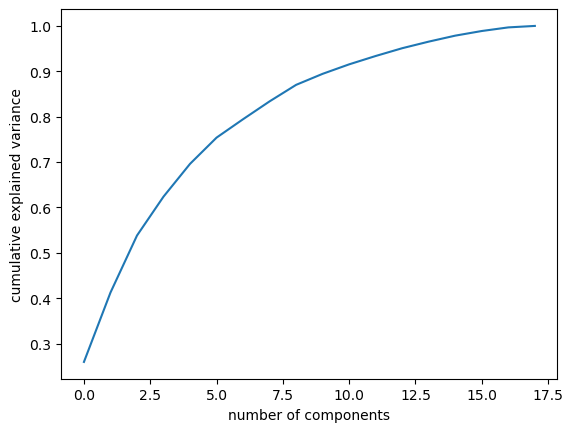

In [15]:
plt.plot(np.cumsum(df_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [16]:
pca = decomposition.PCA(n_components=4)
df_std_pca = pca.fit_transform(df1)

print(df_std_pca.shape)
print(df_std_pca)

(154166, 4)
[[-7.72886060e-01 -4.69829915e-02  5.96692099e-01 -1.40393471e+00]
 [-7.75602761e-01 -4.84932252e-02  6.23541669e-01 -1.48050804e+00]
 [-7.99311844e-01 -6.44770141e-03  6.94719055e-01 -1.45705018e+00]
 ...
 [ 1.04268514e+01 -2.26468078e+00 -1.13269703e+00  1.53228289e+01]
 [ 1.03025227e+01 -2.14298970e+00 -1.30263050e+00  1.51824656e+01]
 [ 1.03279341e+01 -2.13353498e+00 -1.13271688e+00  1.52955957e+01]]


In [17]:
df_std_pca[0]

array([-0.77288606, -0.04698299,  0.5966921 , -1.40393471])

In [18]:
df_train = df_std_pca

In [19]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [20]:
print(most_important_names)

['acc_x_n', 'gyr_x_n', 'kal_status_n', 'difference_r']


In [21]:
df_fin = pd.DataFrame(df_std_pca, columns = ['A','B','C','D'])
df_fin

,A,B,C,D
0,-0.772886,-0.046983,0.596692,-1.403935
1,-0.775603,-0.048493,0.623542,-1.480508
2,-0.799312,-0.006448,0.694719,-1.457050
3,-0.792292,0.039893,0.615263,-1.464746
4,-0.780387,0.097257,0.567798,-1.498815
...,...,...,...,...
154161,10.389290,-2.336097,-1.088985,15.386377
154162,10.408353,-2.335192,-1.143022,15.414929
154163,10.426851,-2.264681,-1.132697,15.322829
154164,10.302523,-2.142990,-1.302630,15.182466
